## Google stock price: Creating a forecast

Using a combinantion of parametic and non parametric methods we will use data for the past 19 years on google stock prices to predict the future value of Googles stock price. Then we will create a interactive Dashboard using Streamlit/Dash/Voila/Panel for comparsion across different outputs of dashboard. 

In [2]:
## Libaries 

## Data handling 
import pandas as pd 

# Math operations 
import numpy as np 

# For visualization 
import matplotlib.pyplot as py
import seaborn as sns 

# Machine learning: Time series analysis -> parametric 

# Machine learning: Time series analysis -> non-parametric



In [3]:
## Load Data 
directory = 'C:/Users/kurtk/Documents/Kaggle projects/Google stocks data 2004 to 2023/archive_data'
file = '/google_stock_price.csv'
data = directory + file
df = pd.read_csv(data)

In [4]:
## Shape of the data
df.shape

(4842, 7)

In [5]:
# view head of the data 
# View first five rows
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [6]:
# Check column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4842 entries, 0 to 4841
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4842 non-null   object 
 1   Open       4842 non-null   float64
 2   High       4842 non-null   float64
 3   Low        4842 non-null   float64
 4   Close      4842 non-null   float64
 5   Adj Close  4842 non-null   float64
 6   Volume     4842 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 264.9+ KB


In [7]:
# First the data needs to chnage to the correct format to be used in a time series analysis 
df['Date'] = pd.to_datetime(df['Date'], yearfirst=True, format="%Y/%m/%d")

In [8]:
# Check for Nan in the data 
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### Preliminary analysis of each feature in the data 

#### Description of the data set :

The dataset present represents Google's stock price from 19th August 2004 when Google went public to 10th of November 2023 with stock price information of 4842 trading sessions. The dataset given has 7 different elements(represented in each column) which provides information about the trading activity and performance of a stock over a specific period. Here's a short overview of all the elements:

 - Date: This column represents the calender date when the data about the stock is recorded.
       
 - Open: This column represents the first recorded price of the stock for a trading session. 
       
- High: The high price represents the highest traded price of the stock during a given trading session. It reflects the peak value that the stock reached during the day.

- Low: The low price is the lowest traded price of the stock during a specific trading session. It indicates the minimum value that the stock reached during the day. - Close: The closing price is the last traded price of the stock at the end of a trading session. It reflects the final value at which the stock was traded before the market closes.
        
- Adj Close(Adjusted Close): The adjusted closing price accounts for corporate actions, such as dividends, stock splits, and new stock offerings, that may affect the stock's price but are not directly related to its performance. The adjusted close is often used to assess the stock's performance over time.
 
- Volume: Volume represents the total number of shares traded during a specific time period. It gives an indication of the level of market activity and liquidity for that stock. High volume often suggests increased investor interest, while low volume may indicate less active trading.

A financial dataset with columns such as Date, Open, High, Low, Close, Adj Close, and Volume information is crucial for technical analysis, trend identification, and understanding the historical performance of a stock.

In [9]:
### Descriptive stats for the features which are float64
df[['Open','High','Close','Low','Adj Close']].describe()

,Open,High,Close,Low,Adj Close
count,4842.000000,4842.000000,4842.000000,4842.000000,4842.000000
mean,41.164402,41.601906,41.181457,40.745188,41.181457
std,38.267895,38.708231,38.295204,37.871644,38.295204
min,2.470490,2.534002,2.490913,2.390042,2.490913
25%,12.819761,12.949089,12.828043,12.702388,12.828043
50%,26.470161,26.668148,26.470153,26.259000,26.470153
75%,57.197751,57.729501,57.315001,56.633139,57.315001
max,151.863495,152.100006,150.709000,149.887497,150.709000


### Disturbution

Looking at the disturbution of vairables will give us better idea of whihc function will be a best fit for our model.

    - According to "Kanellopoulou & Panas" stable disturbutions make for better 
    predictions of stock values, because of the ability to capture the skeweness and fattnes of tails. 
    - Stable disturbutions can be used to measure log-memory stock returns which can 
    help with the accuracy of stock value predictions
    - CAC index in France is well apporximated by stable disturbutions with a 
    characteristic comopnent of less than 2. This means the disturtions have infinite infinite 
    variance which is consistent with the observed leptokurtosis. 
        - Leptokurtosis is evident when the Kurtosis score is greater than 3. 

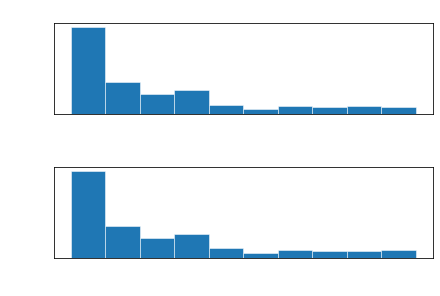

In [10]:
## To understand the distubution of opening and closing price of the stock. 

# Series of values to plot
x = df['Open']
y = df['Close']

# Plotting surfce 
fig, ax = py.subplots(2, layout='constrained') # Layout = constrainted to avoid overlapping of headers and graphs

#Plot
# Bins equla to the number of years of the data
ax[0].hist(x, bins=10, linewidth=0.5, edgecolor="white")
ax[1].hist(y, bins=10, linewidth=0.5, edgecolor="white")


# Title 
ax[0].set_title('Disturbution of opening values', color='white')
ax[1].set_title('Disturbution of closing values', color='white')

# Opening: Edit label of X-axis and Y-axis
ax[0].set_xlabel('Opening prices')
ax[0].set_ylabel('Count')

# Closing: Edit label of X-axis and Y-axis
ax[1].set_xlabel('Closing prices')
ax[1].set_ylabel('Count')

#Opening: Edit color of x-axis and Y-axis
ax[0].xaxis.label.set_color('white')
ax[0].yaxis.label.set_color('white')

#Closing: Edit color of x-axis and Y-axis
ax[1].xaxis.label.set_color('white')
ax[1].yaxis.label.set_color('white')

# Opening: Set color of ticks 
ax[0].tick_params(axis='x', colors='white')
ax[0].tick_params(axis='y', colors='white')

# Coloring: Set color of ticks 
ax[1].tick_params(axis='x', colors='white')
ax[1].tick_params(axis='y', colors='white')

# Show plot
py.show()

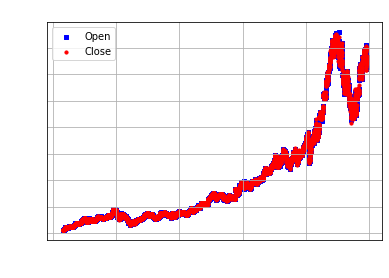

In [11]:
# Scatter plot of the values for opening and closing
values = df[['Open','Close']]
date = df['Date']

# Plotting surfce
#fig, ax = py.subplots(111)

fig = py.figure()
ax = fig.add_subplot(111)


# Scatter plot
#py.scatter(date, values)

ax.scatter(date, values['Open'], s=10, c='b', marker="s", label='Open')
ax.scatter(date, values['Close'], s=10, c='r', marker="o", label='Close')

# Produce a legend
py.legend(loc='upper left')

# Use a grid
ax.grid(True)

# Title of graph
ax.set_title('Scatter plot for values of Opening and Cloisng over', color='white')

# Closing: Edit label of X-axis and Y-axis
ax.set_xlabel('Years')
ax.set_ylabel('Stock price at Open vs Close')

#Opening: Edit color of x-axis and Y-axis
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Opening: Set color of ticks 
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

#Show plot
py.show()


 What can the above graph tell us about googles stock price ? 

    - It is a stable company with low volatility, making it attract to risk averse investors 
    - Google has strong track record of profitability and earnings growth, this provides investors with confidence and this stabilizes the stock price. 
    - The company may have a large instututional investment base. Institutional investors such as mutual and pension funds ten tohold stocks for the long term. This smoothes out the stock price. 
    - Share may be traded in a thin market, this means that shares are not easy to acquire and this keeps the stock a stable level.

In [12]:
### Check Kurtosis of the disturbution for opening and closing values.

print('Kurtosis score for Opening values:',df['Open'].kurtosis())
print('Kurtosis score for Closing values:',df['Close'].kurtosis())

Kurtosis score for Opening values: 0.5814853498909849
Kurtosis score for Closing values: 0.5718250990873162


In [13]:
### Check skewenness of the disturbution for Opening and closing values.

print('Skewness score for Opening values:',df['Open'].skew())
print('Skewness score for Closing values:',df['Close'].skew())

Skewness score for Opening values: 1.2866032617952448
Skewness score for Closing values: 1.2847236013568806


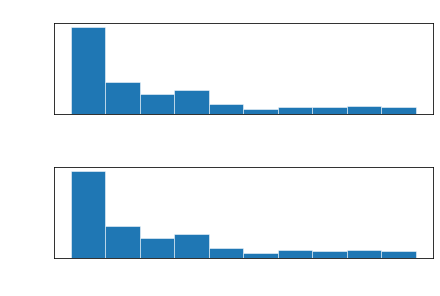

In [14]:
## To understand the distubution of high and low values of the stock price. 

# Series of values to plot
x = df['High']
y = df['Low']

# Plotting surfce 
fig, ax = py.subplots(2, layout='constrained') # Layout = constrainted to avoid overlapping of headers and graphs

#Plot
# Bins equla to the number of years of the data
ax[0].hist(x, bins=10, linewidth=0.5, edgecolor="white")
ax[1].hist(y, bins=10, linewidth=0.5, edgecolor="white")


# Title 
ax[0].set_title('Disturbution of high values', color='white')
ax[1].set_title('Disturbution of low values', color='white')

# Opening: Edit label of X-axis and Y-axis
ax[0].set_xlabel('High values')
ax[0].set_ylabel('Count')

# Closing: Edit label of X-axis and Y-axis
ax[1].set_xlabel('Low values')
ax[1].set_ylabel('Count')

#Opening: Edit color of x-axis and Y-axis
ax[0].xaxis.label.set_color('white')
ax[0].yaxis.label.set_color('white')

#Closing: Edit color of x-axis and Y-axis
ax[1].xaxis.label.set_color('white')
ax[1].yaxis.label.set_color('white')

# Opening: Set color of ticks 
ax[0].tick_params(axis='x', colors='white')
ax[0].tick_params(axis='y', colors='white')

# Coloring: Set color of ticks 
ax[1].tick_params(axis='x', colors='white')
ax[1].tick_params(axis='y', colors='white')

# Show plot
py.show()

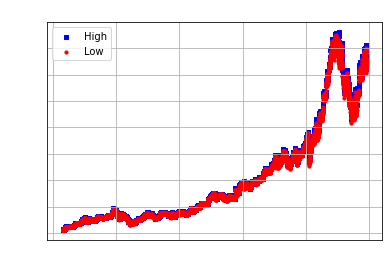

In [15]:
# Scatter plot of the values for High and Low
values = df[['High','Low']]
date = df['Date']

# Plotting surfce
#fig, ax = py.subplots(111)

fig = py.figure()
ax = fig.add_subplot(111)


# Scatter plot
#py.scatter(date, values)

ax.scatter(date, values['High'], s=10, c='b', marker="s", label='High')
ax.scatter(date, values['Low'], s=10, c='r', marker="o", label='Low')

# Produce a legend
py.legend(loc='upper left')

# Use a grid
ax.grid(True)

# Set Title
ax.set_title('Scatter plot for High and low values of stock over time', color='white')

# Closing: Edit label of X-axis and Y-axis
ax.set_xlabel('Years')
ax.set_ylabel('Stock price at High vs Low')

#Opening: Edit color of x-axis and Y-axis
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Opening: Set color of ticks 
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

#Show plot
py.show()

In [16]:
### Kurtosis for High and low Values 

print('Kurtosis score for High values:',df['High'].kurtosis())
print('Kurtosis score for Low values:',df['Low'].kurtosis())

Kurtosis score for High values: 0.5673919353923793
Kurtosis score for Low values: 0.5808501505361936


In [17]:
print('Skewness score for High values:',df['High'].skew())
print('Skewness score for Low values:',df['Low'].skew())

Skewness score for High values: 1.285484466509016
Skewness score for Low values: 1.2852737190205434


### Distubution (Volume)

In [18]:
### Descriptives for int64
df[['Volume']].describe()

,Volume
count,4.842000e+03
mean,1.192432e+08
std,1.513840e+08
min,1.584340e+05
25%,2.867350e+07
50%,6.202500e+07
75%,1.469819e+08
max,1.650833e+09


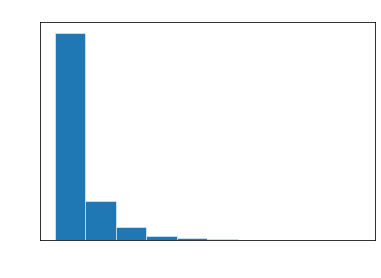

In [19]:
##Create series 
z = df['Volume']

fig, ax = py.subplots()

#Plot
# Bins equla to the number of years of the data
ax.hist(z, bins=10, linewidth=0.5, edgecolor="white")

# Title 
ax.set_title('Disturbution of volume stocks sold', color='white')
#Volume: Edit label of X-axis and Y-axis
ax.set_xlabel('Volume of stock')
#Volume: Edit color of x-axis and Y-axis
ax.xaxis.label.set_color('white')
# Volmue: Set color of ticks 
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
# Show plot
py.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


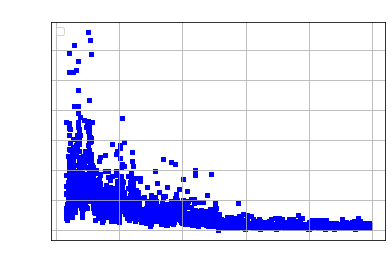

In [20]:
# Scatter plot of the values for High and Low
values = df[['Volume']]
date = df['Date']

# Plotting surfce
#fig, ax = py.subplots(111)

fig = py.figure()
ax = fig.add_subplot(111)

# Scatter plot
ax.scatter(date, values['Volume'], s=10, c='b', marker="s")
#ax.scatter(date, values['Low'], s=10, c='r', marker="o", label='Low')

# Produce a legend
py.legend(loc='upper left')

# Use a grid
ax.grid(True)

# Set Title
ax.set_title('Scatter plot for Volume of stock sold over time', color='white')

# Closing: Edit label of X-axis and Y-axis
ax.set_xlabel('Years')
ax.set_ylabel('Volume of Stock sold')

#Opening: Edit color of x-axis and Y-axis
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Opening: Set color of ticks 
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

#Show plot
py.show()

In [21]:
print('Kurtosis score for Volume of stocks sold:',df['Volume'].kurtosis())

Kurtosis score for Volume of stocks sold: 17.325057895145015


This is a very high value of Kurtosis, indicative of leptokutosis in the diturbution of stocks sold daily. 

In [22]:
print('Skewness score for Volume of stocks sold:',df['Volume'].skew())

Skewness score for Volume of stocks sold: 3.3250652858452754


A positive skewness score indicates that the tail is the right hand side of the disturbution. A socre of alpha = 3.32, indicates a highly skewed disturbution. In this case we consider the disturbution to be skewed to the right, ie it is Right skewed or Right tailed, this is a postive skew. 

### Understanding how well represented each year is.

In [23]:
### Check the number of observations per a year 
df.set_index('Date').resample('Y').count()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-12-31,94,94,94,94,94,94
2005-12-31,252,252,252,252,252,252
2006-12-31,251,251,251,251,251,251
2007-12-31,251,251,251,251,251,251
2008-12-31,253,253,253,253,253,253
2009-12-31,252,252,252,252,252,252
2010-12-31,252,252,252,252,252,252
2011-12-31,252,252,252,252,252,252
2012-12-31,250,250,250,250,250,250


### Time series analysis 

#### The three major components of a time series are:

##### Trend(t):
    -Trend(t): is a long-term increase or decrease in the data which can assume a great variety of patterns ( e.g. , linear, exponential, damped, and polynomial).
            -Real time series with an increasing trend can be found in phenomena related to the demographic development, gradual change of consumption habits, and demand for technologies in the social sectors. 
            -The decreasing trend, in turn, can be found in series concerning the mortality rates, epidemics, and unemployment. 
            -We can use regression models and the MA (moving average) method to obtain this component. We use the trend to estimate the level, i.e. , the value or the typical range of values that the variable assumes if there is no increasing or decreasing trend in the long term.

#### Seasonality(s):

    -Seasonality(s) is the occurrence of cyclic patterns of variation that repeat, at relatively constant time intervals, along with the trend component. 
    -Examples of seasonal patterns are the increase in sales of air conditioners in summer and warm clothing in winter. 
    -Average percentage, percentage relation, relation between MA, and relative links
    are some of the algorithms that allow computing the seasonality from the extraction of seasonal indexes.

#### Residue(r):
    -Residue(r) is the short-term fluctuations that are neither systematic nor predictable. In the real world, unforeseen events cause such instabilities, such as natural disasters, terrorist attacks, and strikes. 
    -In practical terms, the residual component is what remains after the estimation of T and S components, and their removals from the time series.
    -We can define the residue R of a period t of a series Z , in agreement with the additive and multiplicative models, as Rt = Zt −(Tt + St) and Rt = Zt/(Tt × St).

#### Understanding the implimentation of methods: Parametric vs Non-Parametric

Parametric statistics:

    -Where we assume that the sample data we have comes from a population that can be adquately modeled by a probability diturbution that has a fixed number of parameters. 
    -Most well known models are parametric.

Non-Parametric statistics: 

    -In non-parametric statistics we do not relay on the assumption of a specific underlying disturbution (i.e a normal disturbution) or any other sepcific assumptions about the population parameters (mean or variance). 
    -Non-parametric statistics a distubution may not be specified at all or a disturbution may be specified but its parameters, such as mean and variance are not assumend to have a known value or disturbution in advance. 

### Family of models used in time series analysis.
Parametric:

    -Exponential Smoothing 
    -ARIMA
    
Non-Parametric:

    -Global 
    -Local

In [24]:
# Pacakges needed for time series analysis. 

import statsmodels.api as sm

In [25]:
# Select columns wnated for time series analysis
Opening = df[['Date','Open']]

# Check the min and max dates of the Opening data
print('Min open Date:',Opening['Date'].min(),'Max Open Date:',Opening['Date'].max())


Min open Date: 2004-08-19 00:00:00 Max Open Date: 2023-11-10 00:00:00


In [26]:
# Set the date as the index of data frame
Opening = Opening.set_index('Date')

# Resample the data so that we get mean value for each month
y = Opening['Open'].resample('MS').mean()

# Show the y
y.head(10)

Date
2004-08-01    2.625132
2004-09-01    2.788975
2004-10-01    3.798026
2004-11-01    4.437510
2004-12-01    4.517986
2005-01-01    4.817979
2005-02-01    4.876210
2005-03-01    4.525447
2005-04-01    4.954441
2005-05-01    5.917914
Freq: MS, Name: Open, dtype: float64

In [27]:
# Check the opening values from the year of 2020 to the end of the set.
y['2020':]

Date
2020-01-01     71.633977
2020-02-01     73.139289
2020-03-01     59.166546
2020-04-01     61.748131
2020-05-01     68.860594
2020-06-01     71.503227
2020-07-01     75.449638
2020-08-01     76.974309
2020-09-01     76.334772
2020-10-01     77.284864
2020-11-01     87.267860
2020-12-01     88.586056
2021-01-01     90.113500
2021-02-01    103.005974
2021-03-01    103.056392
2021-04-01    114.182751
2021-05-01    117.590727
2021-06-01    124.912230
2021-07-01    132.095374
2021-08-01    138.820068
2021-09-01    142.385136
2021-10-01    139.971263
2021-11-01    147.876745
2021-12-01    145.605254
2022-01-01    136.373150
2022-02-01    137.323105
2022-03-01    135.333098
2022-04-01    129.661474
2022-05-01    113.169976
2022-06-01    112.703512
2022-07-01    112.682900
2022-08-01    117.230435
2022-09-01    104.319286
2022-10-01     99.154047
2022-11-01     94.127380
2022-12-01     93.102381
2023-01-01     93.452400
2023-02-01     96.679420
2023-03-01     97.935652
2023-04-01    105.99

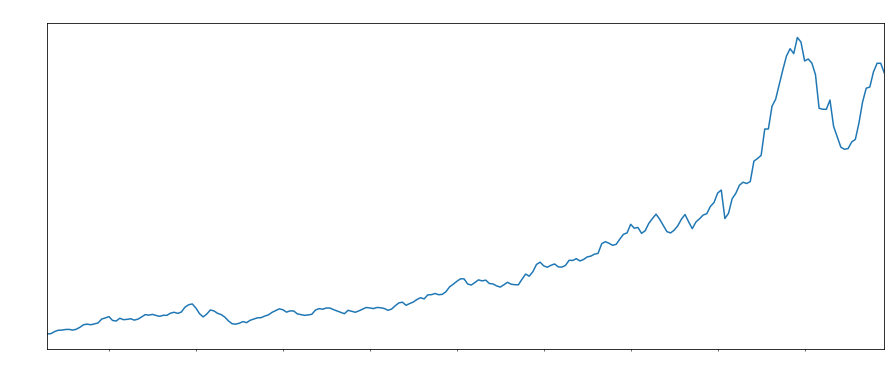

In [28]:
# Plot the opeing values 
open_plot = y.plot(figsize=(15,6))

# Below is to set labels, ticks and the color of labels and ticks.
# Set Title
open_plot.set_title('Opening Values', color='white')

# Closing: Edit label of X-axis and Y-axis
open_plot.set_xlabel('Year')
open_plot.set_ylabel('Opening value of stock')

#Opening: Edit color of x-axis and Y-axis
open_plot.xaxis.label.set_color('white')
open_plot.yaxis.label.set_color('white')

# Opening: Set color of ticks 
open_plot.tick_params(axis='x', colors='white')
open_plot.tick_params(axis='y', colors='white')

#Show plot
py.show()

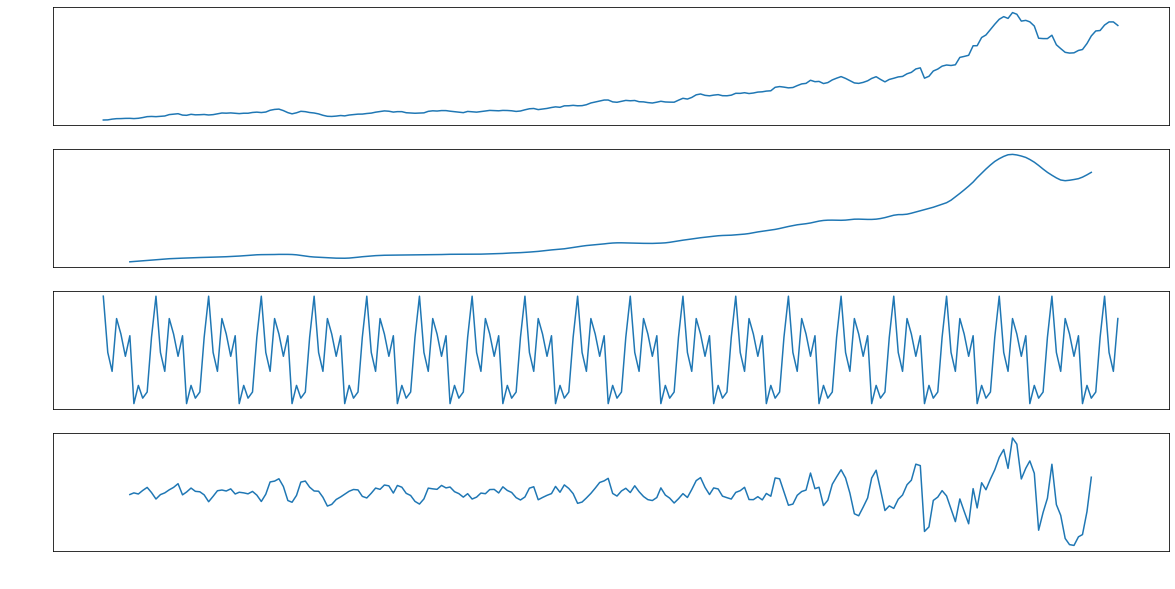

In [29]:
# We can also visualize our data with another method which allows us to see the observed data,
# the trend, the seasonality and the residuals  

# Required pacakage
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

# decompose the timeline into different compnents
decomposition = sm.tsa.seasonal_decompose(y, model='additive')

# Create a subplot
fig, (ax1, ax2, ax3, ax4) = py.subplots(4, 1, figsize=(20, 10), sharex=True)

# Plot the original time series
ax1.plot(y, label='Observed Time Series')
ax1.set_ylabel('Observed')

# Color of labels
ax1.xaxis.label.set_color('white')
ax1.yaxis.label.set_color('white')
# Color of tiacks
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')

# Plot the trend component
ax2.plot(decomposition.trend, label='Trend')
ax2.set_ylabel('Trend')

# Color of labels
ax2.xaxis.label.set_color('white')
ax2.yaxis.label.set_color('white')
# Color of tiacks
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')

# Plot the seasonal component
ax3.plot(decomposition.seasonal, label='Seasonal')
ax3.set_ylabel('Seasonal')

# Color of labels
ax3.xaxis.label.set_color('white')
ax3.yaxis.label.set_color('white')
# Color of tiacks
ax3.tick_params(axis='x', colors='white')
ax3.tick_params(axis='y', colors='white')

# Plot the residual component
ax4.plot(decomposition.resid, label='Residual')
ax4.set_ylabel('Residual')

# Color of labels
ax4.xaxis.label.set_color('white')
ax4.yaxis.label.set_color('white')
# Color of tiacks
ax4.tick_params(axis='x', colors='white')
ax4.tick_params(axis='y', colors='white')

# Set common xlabel
py.xlabel('Date')
# Show plot
py.show()
